In [1]:
import pystan
import numpy as np
import pylab as p
from scipy import integrate
import matplotlib.pyplot as plt
import seaborn as sns
from utils import plot_circle

In [2]:
lotka_code = """
functions {
  real[] dz_dt(real t,       // time
               real[] z,     // system state {prey, predator}
               real[] theta, // parameters
               real[] x_r,   // unused data
               int[] x_i) {
    real u = z[1];
    real v = z[2];

    real alpha = theta[1];
    real beta = theta[2];
    real gamma = theta[3];
    real delta = theta[4];

    real du_dt = (alpha - beta * v) * u;
    real dv_dt = (-gamma + delta * u) * v;
    return { du_dt, dv_dt };
  }
}
data {
  int<lower = 0> N;           // number of measurement times
  real ts[N];                 // measurement times > 0
  real y_init[2];             // initial measured populations
  real<lower = 0> y[N, 2];    // measured populations
}
parameters {
  real<lower = 0> theta[4];   // { alpha, beta, gamma, delta }
  real<lower = 0> z_init[2];  // initial population
  real<lower = 0> sigma[2];   // measurement errors
}
transformed parameters {
  real z[N, 2]
    = integrate_ode_rk45(dz_dt, z_init, 0, ts, theta,
                         rep_array(0.0, 0), rep_array(0, 0),
                         1e-5, 1e-3, 5e2);
}
model {
  theta[{1, 3}] ~ normal(1, 0.5);
  theta[{2, 4}] ~ normal(0.05, 0.05);
  sigma ~ lognormal(-1, 1);
  z_init ~ lognormal(log(10), 1);
  for (k in 1:2) {
    y_init[k] ~ lognormal(log(z_init[k]), sigma[k]);
    y[ , k] ~ lognormal(log(z[, k]), sigma[k]);
  }
}
generated quantities {
  real y_init_rep[2];
  real y_rep[N, 2];
  for (k in 1:2) {
    y_init_rep[k] = lognormal_rng(log(z_init[k]), sigma[k]);
    for (n in 1:N)
      y_rep[n, k] = lognormal_rng(log(z[n, k]), sigma[k]);
  }
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=lotka_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4a128733778ce5f23c5393dad014e7e0 NOW.


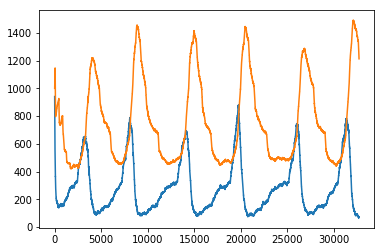

In [3]:
log_file = './results/simple_population_dynamics/exp_1/test_logs/3/log.txt'
prey_num = []
predator_num = []
with open(log_file)as fin:
    for line in fin:
        line = line.split()
        #if len(line) == 12:
        #    prey_num.append(int(line[9]))
        #    predator_num.append(int(line[11]))
        #elif len(line) == 10:
        prey_num.append(int(line[7]))
        predator_num.append(int(line[9]))
prey_num = np.array(prey_num)    
predator_num = np.array(predator_num)

plt.plot(prey_num)
plt.plot(predator_num)

In [5]:
# dat = {'N': 2,
#     'ts': [3.70819294299116, 4.98911472926553],
#     'y_init': [6.3344079550739476, 5.93334017268872],
#     'y': [[3.1265750792953506, 0.45494492391993857],
#           [1.5550498489338422, 2.7987109819349936]]}

# fit = sm.sampling(data=dat, iter=1000, chains=4)
N = len(prey_num[1000:10000:10])-1
ts = list(range(1,N+1))
print(N)

len(prey_num[1001:10000:10])

dat = {'N': N,
    'ts': ts,
    'y_init': [float(prey_num[0]), float(predator_num[0])],
    'y': np.array([prey_num[1:10000].astype(float), predator_num[1:10000]]).T.tolist()}

899


In [ ]:
fit = sm.sampling(data=dat, iter=1000, chains=4)

Process ForkPoolWorker-119:
Process ForkPoolWorker-121:
Process ForkPoolWorker-120:
Process ForkPoolWorker-125:
Process ForkPoolWorker-122:
Process ForkPoolWorker-118:
Process ForkPoolWorker-124:
Process ForkPoolWorker-123:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/pyth

In [ ]:
print(fit)